## Data Analysis of covid data.



## Retreiving the data

### Importing all relavant libraries

In [20]:
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly
import plotly.express as px
import datetime 
from plotly.offline import init_notebook_mode, iplot
%matplotlib inline

## Access the data

In [21]:
covid_data = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

In [22]:
covid_data.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/14/2022,KS,621273,470516.0,150757.0,19414,6964.0,7162,NaN,NaN,21,4.0,01/15/2022 02:59:30 PM,Agree,NaN
1,06/11/2021,TX,2965966,NaN,NaN,1463,355.0,51158,NaN,NaN,17,0.0,06/13/2021 12:00:00 AM,Not agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,01/21/2022,FL,5303375,NaN,NaN,22825,5928.0,64001,NaN,NaN,5,1.0,01/21/2022 12:00:00 AM,Not agree,Not agree
4,12/06/2021,MP,1104,1104.0,0.0,0,0.0,5,5.0,0.0,2,0.0,12/08/2021 12:00:00 AM,Agree,Agree


In [23]:
covid_data["submission_date"]= pd.to_datetime(covid_data["submission_date"], format="%m/%d/%Y")
covid_data["created_at"]= pd.to_datetime(covid_data["created_at"], format="%m/%d/%Y %H:%M:%S %p" )
covid_data.sort_values(by=['submission_date'], inplace=False)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
27041,2020-01-22,MS,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 04:22:39,Agree,Agree
38138,2020-01-22,KS,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 04:22:39,Agree,NaN
5188,2020-01-22,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 04:22:39,Agree,Agree
30961,2020-01-22,OR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 04:22:39,Agree,Agree
19406,2020-01-22,NJ,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,2020-03-26 04:22:39,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,2022-01-23,LA,1060022,NaN,NaN,0,0.0,15324,13276.0,2048.0,0,0.0,2022-01-24 03:59:16,Not agree,Agree
37389,2022-01-23,AS,18,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,2022-01-24 03:59:16,NaN,NaN
16055,2022-01-23,IN,1524527,NaN,NaN,0,0.0,20751,19992.0,759.0,0,0.0,2022-01-24 03:59:16,Not agree,Agree
17378,2022-01-23,ID,358057,281578.0,76479.0,0,0.0,4322,3556.0,766.0,0,0.0,2022-01-24 03:59:16,Agree,Agree


In [24]:
# data types in covid dataset
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43980 entries, 0 to 43979
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  43980 non-null  datetime64[ns]
 1   state            43980 non-null  object        
 2   tot_cases        43980 non-null  int64         
 3   conf_cases       23772 non-null  float64       
 4   prob_cases       23700 non-null  float64       
 5   new_case         43980 non-null  int64         
 6   pnew_case        40108 non-null  float64       
 7   tot_death        43980 non-null  int64         
 8   conf_death       23500 non-null  float64       
 9   prob_death       23500 non-null  float64       
 10  new_death        43980 non-null  int64         
 11  pnew_death       40005 non-null  float64       
 12  created_at       43980 non-null  datetime64[ns]
 13  consent_cases    36645 non-null  object        
 14  consent_deaths   37383 non-null  objec

In [25]:
# check for duplicates
covid_data.duplicated().sum()

0

In [26]:
# check for unique items
covid_data.nunique()

submission_date      733
state                 60
tot_cases          33404
conf_cases         20182
prob_cases         14157
new_case            6999
pnew_case           2703
tot_death          14950
conf_death         11314
prob_death          3336
new_death            489
pnew_death           293
created_at          1678
consent_cases          2
consent_deaths         2
dtype: int64

In [27]:
# check for null values
covid_data.isnull().sum()

submission_date        0
state                  0
tot_cases              0
conf_cases         20208
prob_cases         20280
new_case               0
pnew_case           3872
tot_death              0
conf_death         20480
prob_death         20480
new_death              0
pnew_death          3975
created_at             0
consent_cases       7335
consent_deaths      6597
dtype: int64

In [28]:
clean_data=covid_data.fillna(0)
clean_data

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,2022-01-14,KS,621273,470516.0,150757.0,19414,6964.0,7162,0.0,0.0,21,4.0,2022-01-15 02:59:30,Agree,0
1,2021-06-11,TX,2965966,0.0,0.0,1463,355.0,51158,0.0,0.0,17,0.0,2021-06-13 12:00:00,Not agree,Not agree
2,2022-01-02,AS,11,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,2022-01-03 03:18:16,0,0
3,2022-01-21,FL,5303375,0.0,0.0,22825,5928.0,64001,0.0,0.0,5,1.0,2022-01-21 12:00:00,Not agree,Not agree
4,2021-12-06,MP,1104,1104.0,0.0,0,0.0,5,5.0,0.0,2,0.0,2021-12-08 12:00:00,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43975,2021-09-12,IA,423850,0.0,0.0,1341,287.0,6337,0.0,0.0,0,0.0,2021-09-13 02:26:59,Not agree,Not agree
43976,2020-03-08,OH,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,2020-03-26 04:22:39,Agree,Agree
43977,2021-12-28,NY,1833465,0.0,0.0,13006,0.0,23446,0.0,0.0,42,0.0,2021-12-29 02:30:55,Not agree,Not agree
43978,2021-09-25,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0,2021-09-27 01:21:43,Agree,Agree


In [29]:
clean_data.isnull().sum()

submission_date    0
state              0
tot_cases          0
conf_cases         0
prob_cases         0
new_case           0
pnew_case          0
tot_death          0
conf_death         0
prob_death         0
new_death          0
pnew_death         0
created_at         0
consent_cases      0
consent_deaths     0
dtype: int64

In [30]:
clean_data.describe()

,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,4.398000e+04,4.398000e+04,43980.000000,43980.000000,43980.000000,43980.000000,43980.000000,43980.000000,43980.000000,43980.000000
mean,3.731653e+05,2.129888e+05,28457.799591,1597.102206,228.802660,6667.208140,3848.786880,405.825261,19.201114,1.756025
std,6.665423e+05,4.960898e+05,64836.528169,5037.308697,909.063115,11006.953233,7745.126009,924.294451,45.871187,26.607711
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-10733.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,6.854000e+03,0.000000e+00,0.000000,27.000000,0.000000,137.000000,0.000000,0.000000,0.000000,0.000000
50%,1.141880e+05,6.800000e+01,0.000000,375.000000,0.000000,2050.000000,0.000000,0.000000,4.000000,0.000000
75%,4.718552e+05,2.121945e+05,14333.000000,1398.000000,134.000000,8434.500000,4632.000000,268.000000,19.000000,0.000000
max,7.570538e+06,7.123571e+06,550048.000000,319809.000000,73735.000000,77722.000000,71408.000000,5423.000000,1178.000000,2919.000000


In [31]:
# top 10 entries based on total cases.
#covid_data.sort_values(['tot_cases'], ascending=False).head(10)
clean_data.nlargest(n=10, columns=['tot_cases'], keep='all')

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
9778,2022-01-23,CA,7570538,7123571.0,446967.0,0,0.0,77722,0.0,0.0,0,0.0,2022-01-24 03:59:16,Agree,Not agree
15246,2022-01-21,CA,7570538,7123571.0,446967.0,125861,0.0,77722,0.0,0.0,201,0.0,2022-01-22 02:22:36,Agree,Not agree
24955,2022-01-22,CA,7570538,7123571.0,446967.0,0,0.0,77722,0.0,0.0,0,0.0,2022-01-24 02:28:34,Agree,Not agree
15062,2022-01-20,CA,7444677,6997710.0,446967.0,160454,73735.0,77521,0.0,0.0,176,0.0,2022-01-21 02:36:23,Agree,Not agree
15158,2022-01-19,CA,7284223,6910991.0,373232.0,98637,0.0,77345,0.0,0.0,39,0.0,2022-01-20 03:22:04,Agree,Not agree
24262,2022-01-18,CA,7185586,6812354.0,373232.0,76374,0.0,77306,0.0,0.0,36,0.0,2022-01-19 03:44:00,Agree,Not agree
14986,2022-01-17,CA,7109212,6735980.0,373232.0,319809,0.0,77270,0.0,0.0,330,0.0,2022-01-18 02:47:30,Agree,Not agree
10452,2022-01-16,CA,6789403,6416171.0,373232.0,0,0.0,76940,0.0,0.0,0,0.0,2022-01-17 03:24:48,Agree,Not agree
14021,2022-01-15,CA,6789403,6416171.0,373232.0,0,0.0,76940,0.0,0.0,0,0.0,2022-01-17 02:19:13,Agree,Not agree
26519,2022-01-14,CA,6789403,6416171.0,373232.0,119264,0.0,76940,0.0,0.0,136,0.0,2022-01-15 02:59:30,Agree,Not agree


In [32]:
clean_data['state'].nunique()

60

In [33]:
fig = px.choropleth(clean_data.rename(columns={'conf_cases':'Covid Deaths'}), 
                    locations='state',
                    locationmode = 'USA-states',
                    color='Covid Deaths', 
                    scope='usa'
                    
                   )
#fig.update_layout(geo=dict(
                 # showframe = False,
                  #showcoastlines = False)
                #)
#fig.show()

In [34]:
datewise=covid_data.groupby(["submission_date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

KeyError: "Column(s) ['Confirmed', 'Deaths', 'Recovered'] do not exist"

In [ ]:
def ecdf(data):
    '''Compute ECDF for a one-dimensional array of measurements.'''
    #Number of data points: n
    n = len(data)
    
    #x-data for the ECDF: x
    x = np.sort(data)
    
    #y-data for the ECDF: y
    y = np.arange(1,n+1)/n
    
    return x,y

In [ ]:
#plotting the ecdf based on the confirmed cases.
x, y = ecdf(covid_data['conf_cases'])
fig, ax = plt.subplots()
plt.plot(x,y, marker = '.',linestyle = 'none',markersize=2)
plt.xlabel('Confirmed Cases')
plt.ylabel('ECDF')
plt.figure(figsize=(10, 10))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##  Checking correlations in the data.

[]

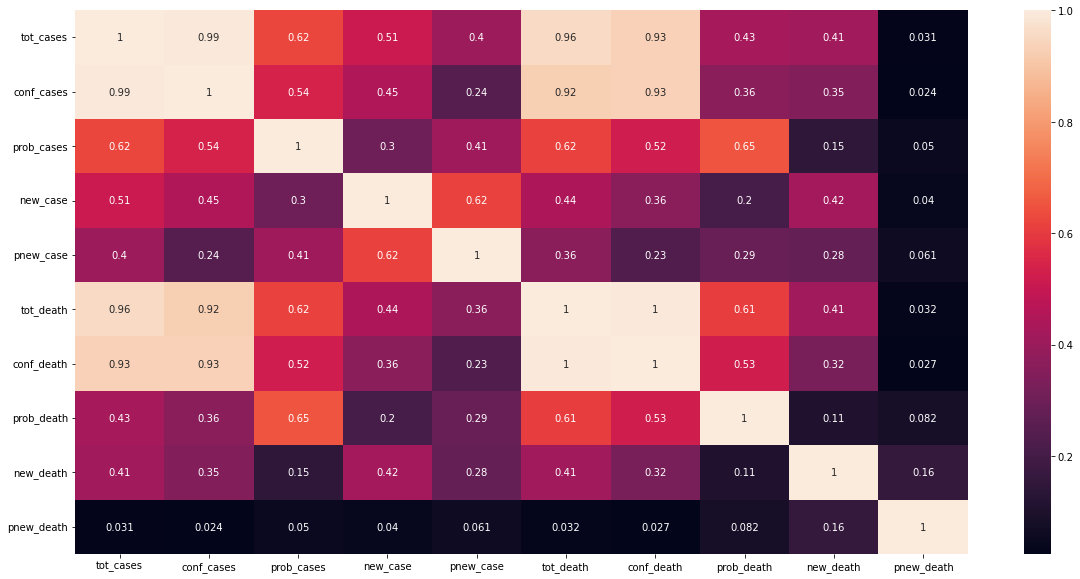

In [ ]:
corr = covid_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.plot()